In [2]:
# download the libraries
import pandas as pd
from pandas import Series,DataFrame
import warnings
from copy import deepcopy
import os
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import random
from pandas.io.json import json_normalize
%matplotlib inline

In [ ]:
# load both of the datasets
traindata = pd.read_pickle('train_flat_no_hits.pkl')
testdata = pd.read_pickle('test_flat_no_hits.pkl')


In [3]:
# add a marker so that you know which dataset is which
traindata['dataset'] = 'train'
testdata['dataset'] = 'test'


In [4]:
traindata.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'device.browser',
       'device.browserVersion', 'device.browserSize', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.isMobile',
       'device.mobileDeviceBranding', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.flashVersion',
       'device.language', 'device.screenColors', 'device.screenResolution',
       'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.sessionQuality

In [5]:
testdata.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'device.browser',
       'device.browserVersion', 'device.browserSize', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.isMobile',
       'device.mobileDeviceBranding', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.flashVersion',
       'device.language', 'device.screenColors', 'device.screenResolution',
       'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.timeOnSite',
       'totals.sessionQualityDim', 'totals.new

In [6]:
# make sure the columns are in the same order in both train and test.
# the deepcopy is just to have a copy of the original even after joining them
col_order = list(set(traindata.columns.tolist() + testdata.columns.tolist()))
traindata = deepcopy(traindata[col_order])
testdata = deepcopy(testdata[col_order])

KeyError: "['trafficSource.campaignCode'] not in index"

In [7]:
traindata.drop('trafficSource.campaignCode',axis=1,inplace= True) #the test doesnt have trafficSource.campaignCode column, 
#so i droped it from the train set

In [8]:
# make sure the columns are in the same order in both train and test.
# the deepcopy is just to have a copy of the original even after joining them
col_order = list(set(traindata.columns.tolist() + testdata.columns.tolist()))
traindata = deepcopy(traindata[col_order])
testdata = deepcopy(testdata[col_order])

In [9]:
# append the two together
all_data = traindata[col_order].append(testdata)

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109926 entries, 0 to 401588
Data columns (total 60 columns):
 #   Column                                             Dtype 
---  ------                                             ----- 
 0   device.flashVersion                                object
 1   geoNetwork.subContinent                            object
 2   geoNetwork.cityId                                  object
 3   customDimension.value                              object
 4   totals.transactionRevenue                          object
 5   trafficSource.adwordsClickInfo.gclId               object
 6   device.browserVersion                              object
 7   trafficSource.adwordsClickInfo.criteriaParameters  object
 8   fullVisitorId                                      object
 9   device.operatingSystemVersion                      object
 10  socialEngagementType                               object
 11  totals.bounces                                     object
 12  g

In [18]:
def values_missing(check):
    total = check.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (check.isnull().sum() / check.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total and percent of missing values: ")
    print (df_train[~(df_train['Total'] == 0)]) # Returning values of nulls different of 0
    
    return

In [19]:
values_missing(all_data)

Total and percent of missing values: 
                                                Total    Percent
totals.totalTransactionRevenue                2086818  98.904796
totals.transactionRevenue                     2086818  98.904796
totals.transactions                           2085062  98.821570
trafficSource.adwordsClickInfo.slot           2024047  95.929762
trafficSource.adwordsClickInfo.isVideoAd      2024047  95.929762
trafficSource.adwordsClickInfo.adNetworkType  2024047  95.929762
trafficSource.adwordsClickInfo.page           2024047  95.929762
trafficSource.adwordsClickInfo.gclId          2023891  95.922369
trafficSource.adContent                       1643600  77.898467
trafficSource.isTrueDirect                    1426999  67.632656
trafficSource.referralPath                    1142073  54.128581
trafficSource.keyword                         1093006  51.803049
totals.timeOnSite                             1057980  50.142991
totals.bounces                                105567

In [20]:
def see_data(data, data_type=object, limit=5): #seting the function with data,show 5 uniques if available 
    n = data.select_dtypes(include=data_type) #selecting the desired data type
    for column in n.columns: #initializing the loop
        print("______________________________________________________________")
        print("Name of column ", column, ': \n', "Uniques: ", data[column].unique()[:limit], "\n",
              " | >> Total nulls: ", (round(data[column].isnull().sum() / len(data[column]) * 100,1)),
              " | >> Total unique values: ", all_data.nunique()[column]) #print the data and % of nulls)
        print("_________________________________________________________")

In [21]:
see_data(traindata)

______________________________________________________________
Name of column  device.browser : 
 Uniques:  ['Firefox' 'Chrome' 'Safari' 'UC Browser' 'Internet Explorer'] 
  | >> Total nulls:  0.0  | >> Total unique values:  161
_________________________________________________________
______________________________________________________________
Name of column  totals.transactionRevenue : 
 Uniques:  [nan '15190000' '8000000' '57300000' '18230000'] 
  | >> Total nulls:  98.9  | >> Total unique values:  8219
_________________________________________________________
______________________________________________________________
Name of column  trafficSource.adwordsClickInfo.gclId : 
 Uniques:  [nan
 'Cj0KCQjwsZHPBRClARIsAC-VMPBHdNF2oMOgh6Xp6YhjXWSk11sDu3eCo4De_u6l4xafqgrPVPSGYdkaArkiEALw_wcB'
 'CODVoMjJ9tYCFUIvgQod_dsKEA'
 'Cj0KCQjwsZHPBRClARIsAC-VMPA4CVJtDhu1lYkB0AR1hje1goUMHQZNJMrsSWD57pLnv1KE_L7pCEcaAunKEALw_wcB'
 'Cj0KCQjwsZHPBRClARIsAC-VMPDlLD6kS4tmqFGZjMUqyerwe0WDaULaAKNkj-gwuvPn

In [11]:
drop_col_list = ['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion',
                 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 
                 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 
                 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 
                 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'trafficSource.campaign', 'trafficSource.referralPath', 
                 'trafficSource.adwordsClickInfo.page','trafficSource.adwordsClickInfo.slot', 
                 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adContent', 'trafficSource.adwordsClickInfo.gclId', 
                 'customDimension.index','totals.visits','trafficSource.keyword']

In [12]:
all_data.drop(drop_col_list, axis=1, inplace=True)  #to drop them

In [13]:
all_data['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1(since least for a visit to the site means 1 page seen)
all_data['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0(0 is suitable for Nan here)
all_data['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0(0 is suitable for Nan here)
all_data["totals.transactionRevenue"] = all_data["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
all_data["totals.totalTransactionRevenue"] = all_data["totals.totalTransactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
all_data["totals.transactionRevenue"] = all_data["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
all_data["totals.transactions"] = all_data["totals.transactions"].fillna(0).astype(int) #filling NA with zero
all_data['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False is its NAn
all_data['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean is its NAn
all_data['customDimension.value'].fillna('(not set)', inplace=True) # filling NA with '(not set)'
all_data['trafficSource.adwordsClickInfo.adNetworkType'].fillna('(not set)', inplace=True) # filling NA with '(not set)'
all_data['totals.timeOnSite'].fillna(0, inplace=True) #filling NA's with 0(0 is suitable for Nan here)
all_data['totals.sessionQualityDim'].fillna(0, inplace=True) #filling NA's with 0(0 is suitable for Nan here)
#To convert
all_data['totals.pageviews'] = all_data['totals.pageviews'].astype(int) # setting numerical column as integer
all_data['totals.newVisits'] = all_data['totals.newVisits'].astype(int) # setting numerical column as integer
all_data['totals.bounces'] = all_data['totals.bounces'].astype(int)  # setting numerical column as integer
all_data["totals.hits"] = all_data["totals.hits"].astype(float) # setting numerical to float
all_data['totals.sessionQualityDim'] = all_data['totals.sessionQualityDim'].astype(int)
all_data['totals.timeOnSite'] = all_data['totals.timeOnSite'].astype(int)
all_data['date'] = pd.to_datetime(all_data["date"], format="%Y%m%d") #convert to datetime

In [14]:
all_data['geoNetwork.metro'].replace({"not available in demo dataset": "(not set)"}, inplace=True)

In [27]:
all_data.isnull().sum()

device.browser                                  0
totals.transactionRevenue                       0
totals.hits                                     0
totals.timeOnSite                               0
trafficSource.medium                            0
geoNetwork.metro                                0
totals.sessionQualityDim                        0
totals.pageviews                                0
customDimension.value                           0
totals.totalTransactionRevenue                  0
date                                            0
visitId                                         0
trafficSource.isTrueDirect                      0
visitNumber                                     0
geoNetwork.region                               0
device.deviceCategory                           0
geoNetwork.city                                 0
channelGrouping                                 0
trafficSource.adwordsClickInfo.adNetworkType    0
fullVisitorId                                   0


In [15]:
all_data.to_csv('/Users/chris/Desktop/chris_files.csv/all_data.csv',index=False)

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109926 entries, 0 to 401588
Data columns (total 33 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   device.browser                                object        
 1   totals.transactionRevenue                     float64       
 2   totals.hits                                   float64       
 3   totals.timeOnSite                             int32         
 4   trafficSource.medium                          object        
 5   geoNetwork.metro                              object        
 6   totals.sessionQualityDim                      int32         
 7   totals.pageviews                              int32         
 8   customDimension.value                         object        
 9   totals.totalTransactionRevenue                float64       
 10  date                                          datetime64[ns]
 11  visitId                  

In [29]:
all_data.columns

Index(['device.browser', 'totals.transactionRevenue', 'totals.hits',
       'totals.timeOnSite', 'trafficSource.medium', 'geoNetwork.metro',
       'totals.sessionQualityDim', 'totals.pageviews', 'customDimension.value',
       'totals.totalTransactionRevenue', 'date', 'visitId',
       'trafficSource.isTrueDirect', 'visitNumber', 'geoNetwork.region',
       'device.deviceCategory', 'geoNetwork.city', 'channelGrouping',
       'trafficSource.adwordsClickInfo.adNetworkType', 'fullVisitorId',
       'device.isMobile', 'geoNetwork.networkDomain', 'totals.newVisits',
       'geoNetwork.subContinent', 'trafficSource.adwordsClickInfo.isVideoAd',
       'visitStartTime', 'device.operatingSystem', 'geoNetwork.continent',
       'dataset', 'geoNetwork.country', 'totals.bounces',
       'totals.transactions', 'trafficSource.source'],
      dtype='object')

In [25]:
'''
columns to hotcode

channelGrouping                               object  unique values:  8
date                                          int64  - convert to date time
fullVisitorId                                 object - organisers insist to be left as str
device.browser                                object - unique values:  129
device.operatingSystem                        object - unique values:  24
device.isMobile                               bool   - unique values:  2
device.deviceCategory                         object - unique values:  3
geoNetwork.continent                          object - unique values:  6
geoNetwork.subContinent                       object - unique values:  23
geoNetwork.country                            object - unique values:  228
geoNetwork.region                             object - unique values:  284
geoNetwork.metro                              object - unique values:  123
geoNetwork.city                               object - unique values:  956
geoNetwork.networkDomain                      object - unique values:  41982
totals.sessionQualityDim                      object - convert to interger
totals.timeOnSite                             object - convert to interger
trafficSource.source                          object - unique values:  345
trafficSource.medium                          object - unique values:  7
trafficSource.isTrueDirect                    bool   - unique values:  2 
trafficSource.adwordsClickInfo.adNetworkType  object - unique values:  3
trafficSource.adwordsClickInfo.isVideoAd      bool   - unique values:  2 
customDimension.value                         object - unique values:  5
'''

'\ncolumns to hotcode\nchannelGrouping                               object \ndate                                          int64  - convert to date time\nfullVisitorId                                 object \ndevice.browser                                object \ndevice.operatingSystem                        object\ndevice.isMobile                               bool   \ndevice.deviceCategory                         object \ngeoNetwork.continent                          object \ngeoNetwork.subContinent                       object \ngeoNetwork.country                            object \ngeoNetwork.region                             object \ngeoNetwork.metro                              object \ngeoNetwork.city                               object \ngeoNetwork.networkDomain                      object \ntotals.sessionQualityDim                      object \ntotals.timeOnSite                             object \ntrafficSource.source                          object \ntrafficSource.medium 

In [59]:
cat_cols = ['device.browser', 'totals.hits','trafficSource.medium', 'geoNetwork.metro', 'customDimension.value',
            'visitId','trafficSource.isTrueDirect','geoNetwork.region','device.deviceCategory', 'geoNetwork.city', 
            'channelGrouping','trafficSource.adwordsClickInfo.adNetworkType', 'fullVisitorId',
            'device.isMobile', 'geoNetwork.networkDomain','geoNetwork.subContinent', 'trafficSource.adwordsClickInfo.isVideoAd',
            'device.operatingSystem', 'geoNetwork.continent','geoNetwork.country','trafficSource.source']
   

In [2]:
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()

In [65]:
all_data

device.browser  totals.transactionRevenue  totals.hits  \
0             Firefox                        0.0          1.0   
1              Chrome                        0.0          2.0   
2              Chrome                        0.0          2.0   
3              Chrome                        0.0          2.0   
4              Chrome                        0.0          2.0   
...               ...                        ...          ...   
401584         Chrome                        0.0          3.0   
401585         Chrome                        0.0          3.0   
401586        Firefox                        0.0          3.0   
401587         Chrome                        0.0          3.0   
401588         Chrome                        0.0          3.0   

        totals.timeOnSite trafficSource.medium  \
0                       0              organic   
1                      28             referral   
2                      38               (none)   
3                       1              organic   
4                      52              organic   
...                   ...                  ...   
401584                111              organic   
401585                 10              organic   
401586                 63              organic   
401587                 64              organic   
401588                 17               (none)   

                         geoNetwork.metro  totals.sessionQualityDim  \
0                               (not set)                         1   
1       San Francisco-Oakland-San Jose CA                         2   
2                               (not set)                         1   
3                               (not set)                         1   
4                               (not set)                         1   
...                                   ...                       ...   
401584                          (not set)                         1   
401585                          (not set)                         1   
401586                          (not set)                         1   
401587                          (not set)                         1   
401588                          (not set)                         1   

        totals.pageviews customDimension.value  \
0                      1                  EMEA   
1                      2         North America   
2                      2         North America   
3                      2                  EMEA   
4                      2       Central America   
...                  ...                   ...   
401584                 3                  EMEA   
401585                 3         North America   
401586                 3             (not set)   
401587                 3         North America   
401588                 3             (not set)   

        totals.totalTransactionRevenue  ... geoNetwork.subContinent  \
0                                  0.0  ...          Western Europe   
1                                  0.0  ...        Northern America   
2                                  0.0  ...        Northern America   
3                                  0.0  ...            Western Asia   
4                                  0.0  ...         Central America   
...                                ...  ...                     ...   
401584                             0.0  ...         Northern Europe   
401585                             0.0  ...        Northern America   
401586                             0.0  ...         Southern Europe   
401587                             0.0  ...        Northern America   
401588                             0.0  ...           Southern Asia   

        trafficSource.adwordsClickInfo.isVideoAd  visitStartTime  \
0                                           True      1508198450   
1                                           True      1508176307   
2                                           True      1508201613   
3                                           Tr

In [68]:
test_2nd = deepcopy(all_data)

In [71]:
for col in cat_cols:
    test_2nd[col] = leb.fit_transform(test_2nd[col])

In [72]:
test_2nd

device.browser  totals.transactionRevenue  totals.hits  \
0                   64                        0.0            0   
1                   55                        0.0            1   
2                   55                        0.0            1   
3                   55                        0.0            1   
4                   55                        0.0            1   
...                ...                        ...          ...   
401584              55                        0.0            2   
401585              55                        0.0            2   
401586              64                        0.0            2   
401587              55                        0.0            2   
401588              55                        0.0            2   

        totals.timeOnSite  trafficSource.medium  geoNetwork.metro  \
0                       0                     5                 0   
1                      28                     6               104   
2                      38                     0                 0   
3                       1                     5                 0   
4                      52                     5                 0   
...                   ...                   ...               ...   
401584                111                     5                 0   
401585                 10                     5                 0   
401586                 63                     5                 0   
401587                 64                     5                 0   
401588                 17                     0                 0   

        totals.sessionQualityDim  totals.pageviews  customDimension.value  \
0                              1                 1                      3   
1                              2                 2                      4   
2                              1                 2                      4   
3                              1                 2                      3   
4                              1                 2                      2   
...                          ...               ...                    ...   
401584                         1                 3                      3   
401585                         1                 3                      4   
401586                         1                 3                      0   
401587                         1                 3                      4   
401588                         1                 3                      0   

        totals.totalTransactionRevenue  ... geoNetwork.subContinent  \
0                                  0.0  ...                      22   
1                                  0.0  ...                      12   
2                                  0.0  ...                      12   
3                                  0.0  ...                      21   
4                                  0.0  ...                       3   
...                                ...  ...                     ...   
401584                             0.0  ...                      13   
401585                             0.0  ...                      12   
401586                             0.0  ...                      19   
401587                             0.0  ...                      12   
401588                             0.0  ...                      18   

        trafficSource.adwordsClickInfo.isVideoAd  visitStartTime  \
0                                              1      1508198450   
1                                              1      1508176307   
2                                              1      1508201613   
3                                              1      1508169851   
4                                              1      1508190552   
...                                          ...             ...   
401584                                         1      1536353803   
401585                                         1      1536388075

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score as accuracy
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
test_1k = test_2nd.head(200000)

In [113]:
x_1k = test_1k.drop(['totals.transactionRevenue','date','dataset','totals.totalTransactionRevenue'],axis=1)
y_1k = test_1k['totals.transactionRevenue'].astype(int)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_1k, y_1k, random_state=111)

model1k = RandomForestRegressor(
    n_estimators=50, # Hyperparameter 1
    max_depth=2,      # Hyperparameter 2
    random_state=0
)

trained_model1k = model1k.fit(x_train, y_train)

test_predictions1k = trained_model1k.predict(x_test)

r2_score(y_test, test_predictions1k)

0.14979797685320584

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x_1k, y_1k, random_state=40)

model = RandomForestClassifier(
    n_estimators=100, # Hyperparameter 1
    max_depth=2,      # Hyperparameter 2
    random_state=0
)

trained_model = model.fit(x_train, y_train)

test_predictions = trained_model.predict(x_test)

accuracy(y_test, test_predictions)

0.9888

In [7]:
rfr = pd.read_csv('all_data.csv',sep=',')

In [3]:
rfr.head()

geoNetwork.subContinent customDimension.value  totals.transactionRevenue  \
0          Western Europe                  EMEA                        0.0   
1        Northern America         North America                        0.0   
2        Northern America         North America                        0.0   
3            Western Asia                  EMEA                        0.0   
4         Central America       Central America                        0.0   

         fullVisitorId  totals.bounces              geoNetwork.region  \
0  3162355547410993243               1  not available in demo dataset   
1  8934116514970143966               0                     California   
2  7992466427990357681               0  not available in demo dataset   
3  9075655783635761930               0  not available in demo dataset   
4  6960673291025684308               0  not available in demo dataset   

         date  visitStartTime  totals.sessionQualityDim  \
0  2017-10-16      1508198450                         1   
1  2017-10-16      1508176307                         2   
2  2017-10-16      1508201613                         1   
3  2017-10-16      1508169851                         1   
4  2017-10-16      1508190552                         1   

   trafficSource.adwordsClickInfo.isVideoAd  ...  \
0                                      True  ...   
1                                      True  ...   
2                                      True  ...   
3                                      True  ...   
4                                      True  ...   

   totals.totalTransactionRevenue channelGrouping device.isMobile  \
0                             0.0  Organic Search           False   
1                             0.0        Referral           False   
2                             0.0          Direct            True   
3                             0.0  Organic Search           False   
4                             0.0  Organic Search           False   

  geoNetwork.continent geoNetwork.country     visitId  device.browser dataset  \
0               Europe            Germany  1508198450         Firefox   train   
1             Americas      United States  1508176307          Chrome   train   
2             Americas      United States  1508201613          Chrome   train   
3                 Asia             Turkey  1508169851          Chrome   train   
4             Americas             Mexico  1508190552          Chrome   train   

   geoNetwork.networkDomain  totals.pageviews  
0                 (not set)                 1  
1                 (not set)                 2  
2       windjammercable.net                 2  
3           unknown.unknown                 2  
4     prod-infinitum.com.mx                 2  

[5 rows x 33 columns]

In [9]:
import gc, pickle
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ppscore as pps
#import shap, optuna
from pdpbox import pdp

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
rmse = lambda true, pred: mse(true, pred) ** 0.5
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA

In [ ]:
#! pip install --upgrade ppscore
#! pip install --upgrade plotly
#! pip install --upgrade nbformat
#! pip install --upgrade optuna
#! pip install --upgrade pdpbox
#! pip install --upgrade shap

In [8]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109926 entries, 0 to 2109925
Data columns (total 33 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   geoNetwork.subContinent                       object 
 1   customDimension.value                         object 
 2   totals.transactionRevenue                     float64
 3   fullVisitorId                                 object 
 4   totals.bounces                                int64  
 5   geoNetwork.region                             object 
 6   date                                          object 
 7   visitStartTime                                int64  
 8   totals.sessionQualityDim                      int64  
 9   trafficSource.adwordsClickInfo.isVideoAd      bool   
 10  totals.timeOnSite                             int64  
 11  device.deviceCategory                         object 
 12  geoNetwork.city                               object 
 1

In [10]:
def is_transaction(n):
    
    if n == 0    :    return 0
    else         :    return 1

rfr['is_transaction']=rfr['totals.transactions'].apply(is_transaction)

In [13]:
rfr['is_transaction'].value_counts()

0    2085062
1      24864
Name: is_transaction, dtype: int64

In [14]:
TARGET = 'is_transaction'
CAT_COLS = rfr.columns[rfr.dtypes == object].tolist()
CONT_COLS = [c for c in rfr.columns if c not in CAT_COLS and c != TARGET]

In [15]:
CAT_COLS.remove('date')
CAT_COLS.remove('fullVisitorId')
CAT_COLS

['geoNetwork.subContinent',
 'customDimension.value',
 'geoNetwork.region',
 'device.deviceCategory',
 'geoNetwork.city',
 'trafficSource.source',
 'device.operatingSystem',
 'geoNetwork.metro',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.medium',
 'channelGrouping',
 'geoNetwork.continent',
 'geoNetwork.country',
 'device.browser',
 'dataset',
 'geoNetwork.networkDomain']

In [16]:
CONT_COLS.remove('totals.transactions')
CONT_COLS.remove('totals.transactionRevenue')
CONT_COLS.remove('totals.totalTransactionRevenue')
CONT_COLS

['totals.bounces',
 'visitStartTime',
 'totals.sessionQualityDim',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'totals.timeOnSite',
 'visitNumber',
 'totals.hits',
 'totals.newVisits',
 'trafficSource.isTrueDirect',
 'device.isMobile',
 'visitId',
 'totals.pageviews']

In [17]:
M1_data = deepcopy(rfr[CAT_COLS + CONT_COLS + [TARGET]])

M1_data[CAT_COLS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109926 entries, 0 to 2109925
Data columns (total 16 columns):
 #   Column                                        Dtype 
---  ------                                        ----- 
 0   geoNetwork.subContinent                       object
 1   customDimension.value                         object
 2   geoNetwork.region                             object
 3   device.deviceCategory                         object
 4   geoNetwork.city                               object
 5   trafficSource.source                          object
 6   device.operatingSystem                        object
 7   geoNetwork.metro                              object
 8   trafficSource.adwordsClickInfo.adNetworkType  object
 9   trafficSource.medium                          object
 10  channelGrouping                               object
 11  geoNetwork.continent                          object
 12  geoNetwork.country                            object
 13  device.brows

In [18]:
from sklearn.preprocessing import LabelEncoder
for col in CAT_COLS:
    M1_data[col] = LabelEncoder().fit_transform(M1_data[col])

In [23]:
M1_data.head()

geoNetwork.subContinent  customDimension.value  geoNetwork.region  \
0                       22                      3                517   
1                       12                      4                 74   
2                       12                      4                517   
3                       21                      3                517   
4                        3                      2                517   

   device.deviceCategory  geoNetwork.city  trafficSource.source  \
0                      0             1096                   117   
1                      0              256                   339   
2                      1             1096                     0   
3                      0             1096                   117   
4                      0             1096                   117   

   device.operatingSystem  geoNetwork.metro  \
0                      22                 0   
1                       3               104   
2                       1                 0   
3                      22                 0   
4                      22                 0   

   trafficSource.adwordsClickInfo.adNetworkType  trafficSource.medium  ...  \
0                                             0                     5  ...   
1                                             0                     6  ...   
2                                             0                     0  ...   
3                                             0                     5  ...   
4                                             0                     5  ...   

   trafficSource.adwordsClickInfo.isVideoAd  totals.timeOnSite  visitNumber  \
0                                      True                  0            1   
1                                      True                 28            6   
2                                      True                 38            1   
3                                      True                  1            1   
4                                      True                 52            1   

   totals.hits  totals.newVisits  trafficSource.isTrueDirect  device.isMobile  \
0          1.0                 1                       False            False   
1          2.0                 0                       False            False   
2          2.0                 1                        True             True   
3          2.0                 1                       False            False   
4          2.0                 1                       False            False   

      visitId  totals.pageviews  is_transaction  
0  1508198450                 1               0  
1  1508176307                 2               0  
2  1508201613                 2               0  
3  1508169851                 2               0  
4  1508190552                 2               0  

[5 rows x 29 columns]

In [20]:
train = M1_data[M1_data['dataset']==1]
test = M1_data[M1_data['dataset']==0]
train.drop('dataset',axis=1,inplace=True)
test.drop('dataset',axis=1, inplace=True)

In [21]:
train.shape, test.shape

((1708337, 28), (401589, 28))

In [22]:
train.head(10)

geoNetwork.subContinent  customDimension.value  geoNetwork.region  \
0                       22                      3                517   
1                       12                      4                 74   
2                       12                      4                517   
3                       21                      3                517   
4                        3                      2                517   
5                       12                      4                 74   
6                       13                      3                141   
7                       13                      0                517   
8                        3                      2                276   
9                       22                      3                517   

   device.deviceCategory  geoNetwork.city  trafficSource.source  \
0                      0             1096                   117   
1                      0              256                   339   
2                      1             1096                     0   
3                      0             1096                   117   
4                      0             1096                   117   
5                      0              858                     0   
6                      0              531                   339   
7                      0             1096                   117   
8                      0              591                   117   
9                      1             1096                   117   

   device.operatingSystem  geoNetwork.metro  \
0                      22                 0   
1                       3               104   
2                       1                 0   
3                      22                 0   
4                      22                 0   
5                       7               104   
6                       7                63   
7                      22                 0   
8                       7                 0   
9                      25                 0   

   trafficSource.adwordsClickInfo.adNetworkType  trafficSource.medium  ...  \
0                                             0                     5  ...   
1                                             0                     6  ...   
2                                             0                     0  ...   
3                                             0                     5  ...   
4                                             0                     5  ...   
5                                             0                     0  ...   
6                                             0                     6  ...   
7                                             0                     5  ...   
8                                             0                     5  ...   
9                                             0                     5  ...   

   trafficSource.adwordsClickInfo.isVideoAd  totals.timeOnSite  visitNumber  \
0                                      True                  0            1   
1                                      True                 28            6   
2                                      True                 38            1   
3                                      True                  1            1   
4                                      True                 52            1   
5                                      True                 12            1   
6                                      True                  9            1   
7                                      True                 15            1   
8                                      True                 34            1   
9                                      True                 32            2   

   totals.hits  totals.newVisits  trafficSource.isTrueDirect  device.isMobile  \
0          1.0                 1                       False            False   
1          2.0                 0                       False   

In [198]:
rfr2 = pd.read_csv('all_data.csv',sep=',')

In [199]:
rfr2["totals.transactionRevenue"] = np.log1p(rfr2["totals.transactionRevenue"].astype(float))

In [203]:
cat_cols = ['device.browser', 'totals.hits','trafficSource.medium', 'geoNetwork.metro', 'customDimension.value',
            'trafficSource.isTrueDirect','geoNetwork.region','device.deviceCategory', 'geoNetwork.city', 
            'channelGrouping','trafficSource.adwordsClickInfo.adNetworkType','dataset',
            'device.isMobile', 'geoNetwork.networkDomain','geoNetwork.subContinent', 'trafficSource.adwordsClickInfo.isVideoAd',
            'device.operatingSystem', 'geoNetwork.continent','geoNetwork.country','trafficSource.source']

In [204]:
rfr2.drop(['date','fullVisitorId','visitId','visitStartTime'],axis=1,inplace=True)

In [205]:
rfr2.head()

geoNetwork.subContinent customDimension.value  totals.transactionRevenue  \
0          Western Europe                  EMEA                        0.0   
1        Northern America         North America                        0.0   
2        Northern America         North America                        0.0   
3            Western Asia                  EMEA                        0.0   
4         Central America       Central America                        0.0   

   totals.bounces              geoNetwork.region  totals.sessionQualityDim  \
0               1  not available in demo dataset                         1   
1               0                     California                         2   
2               0  not available in demo dataset                         1   
3               0  not available in demo dataset                         1   
4               0  not available in demo dataset                         1   

   trafficSource.adwordsClickInfo.isVideoAd  totals.timeOnSite  \
0                                      True                  0   
1                                      True                 28   
2                                      True                 38   
3                                      True                  1   
4                                      True                 52   

  device.deviceCategory                geoNetwork.city  ...  \
0               desktop  not available in demo dataset  ...   
1               desktop                      Cupertino  ...   
2                mobile  not available in demo dataset  ...   
3               desktop  not available in demo dataset  ...   
4               desktop  not available in demo dataset  ...   

  trafficSource.medium totals.totalTransactionRevenue  channelGrouping  \
0              organic                            0.0   Organic Search   
1             referral                            0.0         Referral   
2               (none)                            0.0           Direct   
3              organic                            0.0   Organic Search   
4              organic                            0.0   Organic Search   

   device.isMobile geoNetwork.continent  geoNetwork.country  device.browser  \
0            False               Europe             Germany         Firefox   
1            False             Americas       United States          Chrome   
2             True             Americas       United States          Chrome   
3            False                 Asia              Turkey          Chrome   
4            False             Americas              Mexico          Chrome   

   dataset geoNetwork.networkDomain totals.pageviews  
0    train                (not set)                1  
1    train                (not set)                2  
2    train      windjammercable.net                2  
3    train          unknown.unknown                2  
4    train    prod-infinitum.com.mx                2  

[5 rows x 29 columns]

In [206]:
from sklearn.preprocessing import LabelEncoder

In [207]:

for cl in cat_cols:
    ceb = LabelEncoder() 
    rfr2[cl] = ceb.fit_transform(rfr2[cl])

In [208]:
rfr2.head()

geoNetwork.subContinent  customDimension.value  totals.transactionRevenue  \
0                       22                      3                        0.0   
1                       12                      4                        0.0   
2                       12                      4                        0.0   
3                       21                      3                        0.0   
4                        3                      2                        0.0   

   totals.bounces  geoNetwork.region  totals.sessionQualityDim  \
0               1                517                         1   
1               0                 74                         2   
2               0                517                         1   
3               0                517                         1   
4               0                517                         1   

   trafficSource.adwordsClickInfo.isVideoAd  totals.timeOnSite  \
0                                         1                  0   
1                                         1                 28   
2                                         1                 38   
3                                         1                  1   
4                                         1                 52   

   device.deviceCategory  geoNetwork.city  ...  trafficSource.medium  \
0                      0             1096  ...                     5   
1                      0              256  ...                     6   
2                      1             1096  ...                     0   
3                      0             1096  ...                     5   
4                      0             1096  ...                     5   

   totals.totalTransactionRevenue  channelGrouping  device.isMobile  \
0                             0.0                4                0   
1                             0.0                6                0   
2                             0.0                2                1   
3                             0.0                4                0   
4                             0.0                4                0   

   geoNetwork.continent  geoNetwork.country  device.browser  dataset  \
0                     4                  75              64        1   
1                     2                 219              55        1   
2                     2                 219              55        1   
3                     3                 211              55        1   
4                     2                 132              55        1   

   geoNetwork.networkDomain  totals.pageviews  
0                         0                 1  
1                         0                 2  
2                     47195                 2  
3                     44691                 2  
4                     33811                 2  

[5 rows x 29 columns]

## 2.3  Split Train and Test

In [209]:
rfr2['dataset'].value_counts()

1    1708337
0     401589
Name: dataset, dtype: int64

In [210]:
train = rfr2[rfr2['dataset']==1]
test = rfr2[rfr2['dataset']==0]
train.drop('dataset',axis=1,inplace=True)
test.drop('dataset',axis=1, inplace=True)

In [211]:
x_train = train.drop(['totals.transactionRevenue'],axis=1)
x_test = test.drop(['totals.transactionRevenue'],axis=1)
y_train = train['totals.transactionRevenue']
y_test = test['totals.transactionRevenue']

In [212]:
train

geoNetwork.subContinent  customDimension.value  \
0                             22                      3   
1                             12                      4   
2                             12                      4   
3                             21                      3   
4                              3                      2   
...                          ...                    ...   
1708332                        2                      0   
1708333                       18                      0   
1708334                        6                      0   
1708335                       16                      1   
1708336                        3                      2   

         totals.transactionRevenue  totals.bounces  geoNetwork.region  \
0                              0.0               1                517   
1                              0.0               0                 74   
2                              0.0               0                517   
3                              0.0               0                517   
4                              0.0               0                517   
...                            ...             ...                ...   
1708332                        0.0               0                517   
1708333                        0.0               0                517   
1708334                        0.0               0                401   
1708335                        0.0               0                517   
1708336                        0.0               0                517   

         totals.sessionQualityDim  trafficSource.adwordsClickInfo.isVideoAd  \
0                               1                                         1   
1                               2                                         1   
2                               1                                         1   
3                               1                                         1   
4                               1                                         1   
...                           ...                                       ...   
1708332                         0                                         1   
1708333                         0                                         1   
1708334                         0                                         1   
1708335                         0                                         1   
1708336                         0                                         1   

         totals.timeOnSite  device.deviceCategory  geoNetwork.city  ...  \
0                        0                      0             1096  ...   
1                       28                      0              256  ...   
2                       38                      1             1096  ...   
3                        1                      0             1096  ...   
4                       52                      0             1096  ...   
...                    ...                    ...              ...  ...   
1708332                626                      0             1096  ...   
1708333                258                      1             1096  ...   
1708334                991                      1              898  ...   
1708335               1274                      0             1096  ...   
1708336               2653                      1             1096  ...   

         trafficSource.adwordsClickInfo.adNetworkType  trafficSource.medium  \
0                                                   0                     5   
1                                                   0                     6   
2                                                   0                     0   
3                                                   0                     5   
4                                                   0                     5   
...                                               ...                   ...   
1708332             

In [213]:
test

geoNetwork.subContinent  customDimension.value  \
1708337                       18                      1   
1708338                       12                      4   
1708339                       12                      4   
1708340                       12                      4   
1708341                       12                      4   
...                          ...                    ...   
2109921                       13                      3   
2109922                       12                      4   
2109923                       19                      0   
2109924                       12                      4   
2109925                       18                      0   

         totals.transactionRevenue  totals.bounces  geoNetwork.region  \
1708337                        0.0               0                126   
1708338                        0.0               0                 74   
1708339                        0.0               0                517   
1708340                        0.0               0                462   
1708341                        0.0               0                 74   
...                            ...             ...                ...   
2109921                        0.0               0                517   
2109922                        0.0               0                517   
2109923                        0.0               0                517   
2109924                        0.0               0                517   
2109925                        0.0               0                517   

         totals.sessionQualityDim  trafficSource.adwordsClickInfo.isVideoAd  \
1708337                         1                                         1   
1708338                         1                                         1   
1708339                         1                                         1   
1708340                         1                                         1   
1708341                         1                                         1   
...                           ...                                       ...   
2109921                         1                                         1   
2109922                         1                                         1   
2109923                         1                                         1   
2109924                         1                                         1   
2109925                         1                                         1   

         totals.timeOnSite  device.deviceCategory  geoNetwork.city  ...  \
1708337                973                      1                1  ...   
1708338                 49                      0              858  ...   
1708339                 24                      0             1096  ...   
1708340                 25                      1              417  ...   
1708341                 49                      2              432  ...   
...                    ...                    ...              ...  ...   
2109921                111                      1             1096  ...   
2109922                 10                      0             1096  ...   
2109923                 63                      0             1096  ...   
2109924                 64                      0             1096  ...   
2109925                 17                      1             1096  ...   

         trafficSource.adwordsClickInfo.adNetworkType  trafficSource.medium  \
1708337                                             0                     5   
1708338                                             0                     0   
1708339                                             0                     5   
1708340                                             0                     0   
1708341                                             0                     5   
...                                               ...                   ...   
2109921             

In [214]:
y_test

1708337    0.0
1708338    0.0
1708339    0.0
1708340    0.0
1708341    0.0
          ... 
2109921    0.0
2109922    0.0
2109923    0.0
2109924    0.0
2109925    0.0
Name: totals.transactionRevenue, Length: 401589, dtype: float64

In [215]:
y_train

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1708332    0.0
1708333    0.0
1708334    0.0
1708335    0.0
1708336    0.0
Name: totals.transactionRevenue, Length: 1708337, dtype: float64

In [216]:
x_train

geoNetwork.subContinent  customDimension.value  totals.bounces  \
0                             22                      3               1   
1                             12                      4               0   
2                             12                      4               0   
3                             21                      3               0   
4                              3                      2               0   
...                          ...                    ...             ...   
1708332                        2                      0               0   
1708333                       18                      0               0   
1708334                        6                      0               0   
1708335                       16                      1               0   
1708336                        3                      2               0   

         geoNetwork.region  totals.sessionQualityDim  \
0                      517                         1   
1                       74                         2   
2                      517                         1   
3                      517                         1   
4                      517                         1   
...                    ...                       ...   
1708332                517                         0   
1708333                517                         0   
1708334                401                         0   
1708335                517                         0   
1708336                517                         0   

         trafficSource.adwordsClickInfo.isVideoAd  totals.timeOnSite  \
0                                               1                  0   
1                                               1                 28   
2                                               1                 38   
3                                               1                  1   
4                                               1                 52   
...                                           ...                ...   
1708332                                         1                626   
1708333                                         1                258   
1708334                                         1                991   
1708335                                         1               1274   
1708336                                         1               2653   

         device.deviceCategory  geoNetwork.city  trafficSource.source  ...  \
0                            0             1096                   117  ...   
1                            0              256                   339  ...   
2                            1             1096                     0  ...   
3                            0             1096                   117  ...   
4                            0             1096                   117  ...   
...                        ...              ...                   ...  ...   
1708332                      0             1096                   386  ...   
1708333                      1             1096                   386  ...   
1708334                      1              898                   386  ...   
1708335                      0             1096                   100  ...   
1708336                      1             1096                   386  ...   

         trafficSource.adwordsClickInfo.adNetworkType  trafficSource.medium  \
0                                                   0                     5   
1                                                   0                     6   
2                                                   0                     0   
3                                                   0                     5   
4                                                   0                     5   
...                                               ...                   ...   
1708332                                             0                     6   
1

In [217]:
x_test

geoNetwork.subContinent  customDimension.value  totals.bounces  \
1708337                       18                      1               0   
1708338                       12                      4               0   
1708339                       12                      4               0   
1708340                       12                      4               0   
1708341                       12                      4               0   
...                          ...                    ...             ...   
2109921                       13                      3               0   
2109922                       12                      4               0   
2109923                       19                      0               0   
2109924                       12                      4               0   
2109925                       18                      0               0   

         geoNetwork.region  totals.sessionQualityDim  \
1708337                126                         1   
1708338                 74                         1   
1708339                517                         1   
1708340                462                         1   
1708341                 74                         1   
...                    ...                       ...   
2109921                517                         1   
2109922                517                         1   
2109923                517                         1   
2109924                517                         1   
2109925                517                         1   

         trafficSource.adwordsClickInfo.isVideoAd  totals.timeOnSite  \
1708337                                         1                973   
1708338                                         1                 49   
1708339                                         1                 24   
1708340                                         1                 25   
1708341                                         1                 49   
...                                           ...                ...   
2109921                                         1                111   
2109922                                         1                 10   
2109923                                         1                 63   
2109924                                         1                 64   
2109925                                         1                 17   

         device.deviceCategory  geoNetwork.city  trafficSource.source  ...  \
1708337                      1                1                   117  ...   
1708338                      0              858                     0  ...   
1708339                      0             1096                   117  ...   
1708340                      1              417                     0  ...   
1708341                      2              432                   117  ...   
...                        ...              ...                   ...  ...   
2109921                      1             1096                   117  ...   
2109922                      0             1096                   117  ...   
2109923                      0             1096                   117  ...   
2109924                      0             1096                   117  ...   
2109925                      1             1096                     0  ...   

         trafficSource.adwordsClickInfo.adNetworkType  trafficSource.medium  \
1708337                                             0                     5   
1708338                                             0                     0   
1708339                                             0                     5   
1708340                                             0                     0   
1708341                                             0                     5   
...                                               ...                   ...   
2109921                                             0                     5   
2

In [218]:
train.shape, test.shape

((1708337, 28), (401589, 28))

In [219]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1708337, 27), (401589, 27), (1708337,), (401589,))

In [263]:
def get_error(pred, true):
    print(f'RMSE:       {rmse(true, pred)}')
    print(f'MAE:        {mae(true, pred)}')
    print('baseline RMSE:       1.8947300435847645')
    print('baseline MAE:        0.39160228655436513')

In [264]:
rf1 = RandomForestRegressor(
    n_estimators=20, # Hyperparameter 1
    max_depth=6,      # Hyperparameter 2
    max_features= 'auto',
    random_state=0
)

trained_rf1= rf1.fit(x_train, y_train)

pred_rf1 = trained_rf1.predict(x_test)

In [265]:
get_error(pred =pred_rf1, true = y_test)

RMSE:       0.017807545150686874
MAE:        0.0011504937749522058
baseline RMSE:       1.8947300435847645
baseline MAE:        0.39160228655436513


# Baseline 


In [223]:
# naive baseline (prediction is average of training data)y_test
get_error(pred = np.array([np.mean(y_train) for _ in range(len(y_test))]),
          true = y_test)

RMSE:       1.8947300435847645
MAE:        0.39160228655436513


### working with on user that purchased something

In [224]:
purchased = rfr2[rfr2['totals.transactionRevenue'] > 0 ]

In [225]:
purchased

geoNetwork.subContinent  customDimension.value  \
433                           12                      4   
550                           12                      4   
555                           12                      4   
597                           12                      4   
619                           12                      4   
...                          ...                    ...   
2108360                       12                      4   
2108364                       12                      4   
2108365                       12                      4   
2108367                       12                      4   
2108382                       12                      4   

         totals.transactionRevenue  totals.bounces  geoNetwork.region  \
433                      16.536148               0                304   
550                      15.894952               0                 74   
555                      17.863811               0                 74   
597                      16.718579               0                 74   
619                      16.325923               0                304   
...                            ...             ...                ...   
2108360                  18.459132               0                517   
2108364                  17.825386               0                517   
2108365                  17.686503               0                 74   
2108367                  19.147311               0                304   
2108382                  17.772889               0                269   

         totals.sessionQualityDim  trafficSource.adwordsClickInfo.isVideoAd  \
433                            13                                         1   
550                            38                                         1   
555                            42                                         1   
597                            77                                         1   
619                            62                                         1   
...                           ...                                       ...   
2108360                        81                                         1   
2108364                        82                                         1   
2108365                        80                                         1   
2108367                        87                                         1   
2108382                        58                                         1   

         totals.timeOnSite  device.deviceCategory  geoNetwork.city  ...  \
433                    261                      0              664  ...   
550                    285                      0              432  ...   
555                   1044                      1              621  ...   
597                    514                      0              621  ...   
619                    487                      0              664  ...   
...                    ...                    ...              ...  ...   
2108360               1047                      0             1096  ...   
2108364               2045                      0             1096  ...   
2108365               1869                      0              950  ...   
2108367               1460                      0              664  ...   
2108382                321                      0              173  ...   

         trafficSource.medium  totals.totalTransactionRevenue  \
433                         5                      17190000.0   
550                         0                      13000000.0   
555                         5                      65300000.0   
597                         0                      25230000.0   
619                         0                      16310000.0   
...                       ...                             ...   
2108360                     5                     109920000.0   
2108364                     0                      63

In [226]:
purchased['dataset'].value_counts()

1    18514
0     4594
Name: dataset, dtype: int64

In [227]:
trainp = purchased[purchased['dataset']==1]
testp = purchased[purchased['dataset']==0]
trainp.drop('dataset',axis=1,inplace=True)
testp.drop('dataset',axis=1, inplace=True)

In [228]:
x_trainp = trainp.drop(['totals.transactionRevenue'],axis=1)
x_testp = testp.drop(['totals.transactionRevenue'],axis=1)
y_trainp = trainp['totals.transactionRevenue']
y_testp = testp['totals.transactionRevenue']

In [229]:
x_trainp.shape, x_testp.shape, y_trainp.shape, y_testp.shape

((18514, 27), (4594, 27), (18514,), (4594,))

In [230]:
rfp = RandomForestRegressor(
    n_estimators=20, # Hyperparameter 1
    max_depth=6,      # Hyperparameter 2
    max_features= 'auto',
    random_state=0
)

trained_rfp= rfp.fit(x_trainp, y_trainp)

pred_rfp = trained_rfp.predict(x_testp)

In [231]:
get_error(pred =pred_rfp, true = y_testp)

RMSE:       0.1525995473833611
MAE:        0.0816868792744489


In [232]:
# naive baseline (prediction is average of training data)y_test
get_error(pred = np.array([np.mean(y_trainp) for _ in range(len(y_testp))]),
          true = y_testp)

RMSE:       1.1056698951423987
MAE:        0.849076531222261


### Tuning and  Optimization

In [112]:
pps_matrix = pps.matrix(purchased)

In [113]:
# heatmap
fig = go.Figure(
    data = go.Heatmap(
        z = pps_matrix.values,
        x = pps_matrix.index,
        y = pps_matrix.columns
    )
)
fig.update_layout(title_text = 'Predictive Power Score Heatmap')
fig.show()

In [114]:
pps_matrix1 = pps.matrix(rfr2)

In [115]:
# heatmap
fig = go.Figure(
    data = go.Heatmap(
        z = pps_matrix1.values,
        x = pps_matrix1.index,
        y = pps_matrix1.columns
    )
)
fig.update_layout(title_text = 'Predictive Power Score Heatmap')
fig.show()

## Tuning Random Forests

In [118]:
# list of values to try for n_estimators
estimators_set = range(10, 100, 10)

# store the error after each iteration
errors = []

# iterate through each of the paramater values and store the error
for n_estimators in estimators_set:
    
    model = RandomForestRegressor(n_estimators = n_estimators)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    error = rmse(y_test, preds)
    errors.append(error)
    del model; gc.collect()
    
    print(f'With {n_estimators} Estimators, Model Error of: {error}')

With 10 Estimators, Model Error of: 30834576.97368951
With 20 Estimators, Model Error of: 28785210.21769539
With 30 Estimators, Model Error of: 30136660.017968494
With 40 Estimators, Model Error of: 30150423.111202616
With 50 Estimators, Model Error of: 30746796.906557318
With 60 Estimators, Model Error of: 29222983.121560387
With 70 Estimators, Model Error of: 29817437.43278328
With 80 Estimators, Model Error of: 29760019.47109262
With 90 Estimators, Model Error of: 28816642.648805197


In [131]:
# plot
#{'n_estimators': list(estimators_set), 'rmse': errors}
#px.line(pd.DataFrame({'n_estimators': list(estimators_set), 'rmse': list(errors)}), x = 'n_estimators', y = 'rmse')

In [119]:
# list of values to try for max_features
max_features_set = ['auto', 'sqrt', 'log2']

# store the error after each iteration
errors = []

# iterate through the possibilities for max_features, recording the accuracy for each
for max_features in max_features_set:
    
    model = RandomForestRegressor(n_estimators = 20)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    error = rmse(y_test, preds)
    errors.append(error)
    del model; gc.collect()
    
    print(f'With {max_features} Estimators, Model Error of: {error}')

With auto Estimators, Model Error of: 30741425.981529787
With sqrt Estimators, Model Error of: 28368209.067968674
With log2 Estimators, Model Error of: 28911565.04144147


In [ ]:
max_features_set = ['auto', 'sqrt', 'log2']

# store the error after each iteration
errors = []

# iterate through the possibilities for max_features, recording the accuracy for each
for max_features in max_features_set:
    
    model = RandomForestRegressor(n_estimators = 20,max_features= max_features)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    error = rmse(y_test, preds)
    errors.append(error)
    del model; gc.collect()
    
    print(f'With {max_features} max_features, Model Error of: {error}')

In [121]:
# plot
px.line(pd.DataFrame({'max_features': list(max_features_set), 'rmse': errors}), x = 'max_features', y = 'rmse')

In [132]:
# list of values to try for max_features
max_depth = [2,4,6,8]

# store the error after each iteration
errors = []

# iterate through the possibilities for max_features, recording the accuracy for each
for max_d in max_depth:
    
    model = RandomForestRegressor(n_estimators = 20)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    error = rmse(y_test, preds)
    errors.append(error)
    del model; gc.collect()
    
    print(f'With {max_d} max_depth, Model Error of: {error}')

With 2 max_depth, Model Error of: 30075531.940438487
With 4 max_depth, Model Error of: 27900946.557165496
With 6 max_depth, Model Error of: 27126031.78569531
With 8 max_depth, Model Error of: 29539873.520701114


## best parameters

In [149]:
x = train.drop('transaction.revenue', 1)

geoNetwork.subContinent  customDimension.value  totals.transactionRevenue  \
0                       22                      3                        0.0   
1                       12                      4                        0.0   
2                       12                      4                        0.0   
3                       21                      3                        0.0   
4                        3                      2                        0.0   

   totals.bounces  geoNetwork.region  totals.sessionQualityDim  \
0               1                517                         1   
1               0                 74                         2   
2               0                517                         1   
3               0                517                         1   
4               0                517                         1   

   trafficSource.adwordsClickInfo.isVideoAd  totals.timeOnSite  \
0                                         1                  0   
1                                         1                 28   
2                                         1                 38   
3                                         1                  1   
4                                         1                 52   

   device.deviceCategory  geoNetwork.city  ...  \
0                      0             1096  ...   
1                      0              256  ...   
2                      1             1096  ...   
3                      0             1096  ...   
4                      0             1096  ...   

   trafficSource.adwordsClickInfo.adNetworkType  trafficSource.medium  \
0                                             0                     5   
1                                             0                     6   
2                                             0                     0   
3                                             0                     5   
4                                             0                     5   

   totals.totalTransactionRevenue  channelGrouping  device.isMobile  \
0                             0.0                4                0   
1                             0.0                6                0   
2                             0.0                2                1   
3                             0.0                4                0   
4                             0.0                4                0   

   geoNetwork.continent  geoNetwork.country  device.browser  \
0                     4                  75              64   
1                     2                 219              55   
2                     2                 219              55   
3                     3                 211              55   
4                     2                 132              55   

   geoNetwork.networkDomain  totals.pageviews  
0                         0                 1  
1                         0                 2  
2                     47195                 2  
3                     44691                 2  
4                     33811                 2  

[5 rows x 28 columns]

In [233]:
# Create the random grid
random_grid = {
    'n_estimators': [25,50,100,250,500],
    'max_features': [ 'auto','sqrt'],
    'max_depth': [None,2,5,10,25],
    'min_samples_split': [2,  6, 8, ],
    'min_samples_leaf': [1, 4, 6,10],
    'bootstrap': [True],
}

# calculate number of possible parameter combinations
for i, n in enumerate([len(v) for v in random_grid.values()]):
    if i+1 == 1: m = n
    else: m *= n
print(f'Number of Combinations: {m}')

Number of Combinations: 600


In [245]:
# use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid,
                               n_iter =200, # search across n combinations
                               cv = 5,        # n fold cross validation
                               verbose = 2,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(sample_x_train,sample_y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 158.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 178.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 200.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...s

In [243]:
sample_y_train = y_train.head(170000)

In [244]:
sample_x_train = x_train.head(170000)

In [247]:
best_para_rand  = rf_random.best_params_

In [248]:
best_para_rand

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
#2nd attempt with best_para_rand

In [249]:
best_rf = RandomForestRegressor(**best_para_rand)

trained_rf3= best_rf.fit(x_train, y_train)

pred_rf3 = trained_rf3.predict(x_test)


In [250]:
get_error(pred =pred_rf3, true = y_test)

RMSE:       0.015626052784658073
MAE:        0.0008617149032321994


In [ ]:
# from 1st test. below. This is an improvement

In [252]:
get_error(pred =pred_rf1, true = y_test)

RMSE:       0.017807545150686874
MAE:        0.0011504937749522058


In [ ]:
#gridserch for further tunnin

In [258]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [450,500,550],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'max_depth': [9,10,],
    'bootstrap': [True],
}

# init new rf instance
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(sample_x_train,sample_y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [260]:
best_para_grid = grid_search.best_params_

In [261]:
best_para_grid

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 450}

In [ ]:
#3rd attempt after best_para_grid

In [262]:
best_grid = RandomForestRegressor(**best_para_grid)

trained_rf4= best_grid.fit(x_train, y_train)

pred_rf4 = trained_rf4.predict(x_test)


In [266]:
get_error(pred =pred_rf4, true = y_test)

RMSE:       0.01569699149186279
MAE:        0.0008721983590214377
baseline RMSE:       1.8947300435847645
baseline MAE:        0.39160228655436513


### 1st attempt 


rf1 = RandomForestRegressor(
    n_estimators=20, # Hyperparameter 1
    max_depth=6,      # Hyperparameter 2
    max_features= 'auto',
    random_state=0
)
trained_rf1= rf1.fit(x_train, y_train)
pred_rf1 = trained_rf1.predict(x_test)

result:
RMSE:       0.017807545150686874
MAE:        0.0011504937749522058


baseline RMSE:       1.8947300435847645
baseline MAE:        0.39160228655436513




### 2nd attempt with random search

best_para_rand :
{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}
 
best_rf = RandomForestRegressor(**best_para_rand)

trained_rf3= best_rf.fit(x_train, y_train)

pred_rf3 = trained_rf3.predict(x_test)

Result:
RMSE:       0.015626052784658073
MAE:        0.0008617149032321994


### 3rd attempt with grid search

best_para_grid

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 450}

best_grid = RandomForestRegressor(**best_para_grid)

trained_rf4= best_grid.fit(x_train, y_train)

pred_rf4 = trained_rf4.predict(x_test)

Result:
RMSE:       0.01569699149186279
MAE:        0.0008721983590214377

## Best tuning = 
{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [267]:
def get_feature_importance(model, feature_names):

    # compute feature importances
    imp = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending = False)

    # add feature type
    imp['feat_type'] = imp.feature.apply(lambda feat: 'categorical' if feat in cat_cols else 'continuous')
    
    return imp.sort_values('importance', ascending = False)

In [ ]:
def get_feature_importance(model, feature_names):

    # compute feature importances
    imp = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending = False)

    # add feature type
    imp['feat_type'] = imp.feature.apply(lambda feat: 'categorical' if feat in cat_cols else 'continuous')
    
    return imp.sort_values('importance', ascending = False)
imp = get_feature_importance(best_rf, x_train.columns.tolist())
px.bar(imp, x = 'feature', y = 'importance', color = 'feat_type')

In [268]:
imp = get_feature_importance(best_rf, x_train.columns.tolist())

In [269]:
px.bar(imp, x = 'feature', y = 'importance', color = 'feat_type')

In [270]:
imp.groupby('feat_type').mean()

importance
feat_type              
categorical    0.000001
continuous     0.124997

In [271]:
imp2 = get_feature_importance(rf1, x_train.columns.tolist())

In [273]:
px.bar(imp2, x = 'feature', y = 'importance', color = 'feat_type')

In [274]:
imp3 = get_feature_importance(best_grid, x_train.columns.tolist())

In [275]:
px.bar(imp3, x = 'feature', y = 'importance', color = 'feat_type')

In [ ]:
#purchased

In [276]:
imp_p = get_feature_importance(rfp, x_trainp.columns.tolist())

In [277]:
px.bar(imp_p, x = 'feature', y = 'importance', color = 'feat_type')

In [ ]:
#let drop the total.transactionRevenue, and see

In [278]:
x_trn = train.drop(['totals.transactionRevenue','totals.totalTransactionRevenue'],axis=1)
x_tst = test.drop(['totals.transactionRevenue','totals.totalTransactionRevenue'],axis=1)
y_trn = train['totals.transactionRevenue']
y_tst = test['totals.transactionRevenue']

In [279]:
no_trrv = RandomForestRegressor(**best_para_rand)

trained_rf5= no_trrv.fit(x_trn, y_trn)

pred_rf5 = trained_rf5.predict(x_tst)

In [280]:
get_error(pred = pred_rf5, true = y_tst)

RMSE:       1.1357580385730062
MAE:        0.08278582739720455
baseline RMSE:       1.8947300435847645
baseline MAE:        0.39160228655436513


In [281]:
# naive baseline (prediction is average of training data)y_test
get_error(pred = np.array([np.mean(y_trn) for _ in range(len(y_tst))]),
          true = y_tst)

RMSE:       1.8947300435847645
MAE:        0.39160228655436513
baseline RMSE:       1.8947300435847645
baseline MAE:        0.39160228655436513


In [282]:
imp_nt = get_feature_importance(no_trrv, x_trn.columns.tolist())

In [283]:
px.bar(imp_nt, x = 'feature', y = 'importance', color = 'feat_type')

In [284]:
np.corrcoef(x_trainp.values, y_trainp.values)[0,1]

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# New _ CREATING NEW FEATURES

In [15]:
rfr = pd.read_csv('all_data.csv',sep=',')

In [16]:
rfr.head()

geoNetwork.subContinent customDimension.value  totals.transactionRevenue  \
0          Western Europe                  EMEA                        0.0   
1        Northern America         North America                        0.0   
2        Northern America         North America                        0.0   
3            Western Asia                  EMEA                        0.0   
4         Central America       Central America                        0.0   

         fullVisitorId  totals.bounces              geoNetwork.region  \
0  3162355547410993243               1  not available in demo dataset   
1  8934116514970143966               0                     California   
2  7992466427990357681               0  not available in demo dataset   
3  9075655783635761930               0  not available in demo dataset   
4  6960673291025684308               0  not available in demo dataset   

         date  visitStartTime  totals.sessionQualityDim  \
0  2017-10-16      1508198450                         1   
1  2017-10-16      1508176307                         2   
2  2017-10-16      1508201613                         1   
3  2017-10-16      1508169851                         1   
4  2017-10-16      1508190552                         1   

   trafficSource.adwordsClickInfo.isVideoAd  ...  \
0                                      True  ...   
1                                      True  ...   
2                                      True  ...   
3                                      True  ...   
4                                      True  ...   

   totals.totalTransactionRevenue channelGrouping device.isMobile  \
0                             0.0  Organic Search           False   
1                             0.0        Referral           False   
2                             0.0          Direct            True   
3                             0.0  Organic Search           False   
4                             0.0  Organic Search           False   

  geoNetwork.continent geoNetwork.country     visitId  device.browser dataset  \
0               Europe            Germany  1508198450         Firefox   train   
1             Americas      United States  1508176307          Chrome   train   
2             Americas      United States  1508201613          Chrome   train   
3                 Asia             Turkey  1508169851          Chrome   train   
4             Americas             Mexico  1508190552          Chrome   train   

   geoNetwork.networkDomain  totals.pageviews  
0                 (not set)                 1  
1                 (not set)                 2  
2       windjammercable.net                 2  
3           unknown.unknown                 2  
4     prod-infinitum.com.mx                 2  

[5 rows x 33 columns]

In [5]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109926 entries, 0 to 2109925
Data columns (total 33 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   geoNetwork.subContinent                       object 
 1   customDimension.value                         object 
 2   totals.transactionRevenue                     float64
 3   fullVisitorId                                 object 
 4   totals.bounces                                int64  
 5   geoNetwork.region                             object 
 6   date                                          object 
 7   visitStartTime                                int64  
 8   totals.sessionQualityDim                      int64  
 9   trafficSource.adwordsClickInfo.isVideoAd      bool   
 10  totals.timeOnSite                             int64  
 11  device.deviceCategory                         object 
 12  geoNetwork.city                               object 
 1

In [17]:
for col in ['visitNumber', 'totals.hits', 'totals.pageviews']:
    rfr[col] = rfr[col].astype(float)

In [18]:
rfr['totals.pageviews'].replace(1,0, inplace=True) #replacin NA's with 0(since least for a visit to the site means 1 page seen)

In [19]:
rfr['visitNumber'] = np.log1p(rfr['visitNumber'])
rfr['totals.hits'] = np.log1p(rfr['totals.hits'])
rfr['totals.pageviews'] = np.log1p(rfr['totals.pageviews'])

In [20]:
rfr['totals.hits']

0          0.693147
1          1.098612
2          1.098612
3          1.098612
4          1.098612
             ...   
2109921    1.386294
2109922    1.386294
2109923    1.386294
2109924    1.386294
2109925    1.386294
Name: totals.hits, Length: 2109926, dtype: float64

In [21]:
rfr['date']

0          2017-10-16
1          2017-10-16
2          2017-10-16
3          2017-10-16
4          2017-10-16
              ...    
2109921    2018-09-07
2109922    2018-09-07
2109923    2018-09-07
2109924    2018-09-07
2109925    2018-09-07
Name: date, Length: 2109926, dtype: object

In [22]:
#rfr['date'] = rfr['date'].astype(str)
#rfr["date"] = rfr["date"].apply(lambda x : x[:4] + x[6] + x[8] + x[10:])
rfr["date"] = pd.to_datetime(rfr["date"])   
rfr["year"] = rfr['date'].dt.year
rfr["month"] = rfr['date'].dt.month
rfr["day"] = rfr['date'].dt.day
rfr["weekday"] = rfr['date'].dt.weekday
rfr['weekofyear'] = rfr['date'].dt.weekofyear
rfr['month_unique_user_count'] = rfr.groupby('month')['fullVisitorId'].transform('nunique')
rfr['day_unique_user_count'] = rfr.groupby('day')['fullVisitorId'].transform('nunique')
rfr['weekday_unique_user_count'] = rfr.groupby('weekday')['fullVisitorId'].transform('nunique')



In [23]:
rfr['mean_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('mean')
rfr['sum_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('sum')
rfr['max_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('max')
rfr['min_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('min')
rfr['var_hits_per_day'] = rfr.groupby(['day'])['totals.hits'].transform('var')

In [24]:
rfr['mean_hits_per_day']

0          1.270605
1          1.270605
2          1.270605
3          1.270605
4          1.270605
             ...   
2109921    1.286455
2109922    1.286455
2109923    1.286455
2109924    1.286455
2109925    1.286455
Name: mean_hits_per_day, Length: 2109926, dtype: float64

In [55]:
rfr['browser.category'] = rfr['device.browser'] + '_' + rfr['device.deviceCategory']
rfr['browser.operatingSystem'] = rfr['device.browser'] + '_' + rfr['device.operatingSystem']
rfr['source.country'] = rfr['trafficSource.source'] + '_' + rfr['geoNetwork.country']

In [26]:
rfr['sum_pageviews.per.network.domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('sum')
rfr['count_pageviews_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('count')
rfr['mean_pageviews_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.pageviews'].transform('mean')


In [27]:
rfr['sum_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('sum')
rfr['count_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('count')
rfr['mean_hits_per_network_domain'] = rfr.groupby('geoNetwork.networkDomain')['totals.hits'].transform('mean')

In [28]:
rfr.head()

geoNetwork.subContinent customDimension.value  totals.transactionRevenue  \
0          Western Europe                  EMEA                        0.0   
1        Northern America         North America                        0.0   
2        Northern America         North America                        0.0   
3            Western Asia                  EMEA                        0.0   
4         Central America       Central America                        0.0   

         fullVisitorId  totals.bounces              geoNetwork.region  \
0  3162355547410993243               1  not available in demo dataset   
1  8934116514970143966               0                     California   
2  7992466427990357681               0  not available in demo dataset   
3  9075655783635761930               0  not available in demo dataset   
4  6960673291025684308               0  not available in demo dataset   

        date  visitStartTime  totals.sessionQualityDim  \
0 2017-10-16      1508198450                         1   
1 2017-10-16      1508176307                         2   
2 2017-10-16      1508201613                         1   
3 2017-10-16      1508169851                         1   
4 2017-10-16      1508190552                         1   

   trafficSource.adwordsClickInfo.isVideoAd  ...  var_hits_per_day  \
0                                      True  ...          0.607615   
1                                      True  ...          0.607615   
2                                      True  ...          0.607615   
3                                      True  ...          0.607615   
4                                      True  ...          0.607615   

  browser.category browser.operatingSystem                  source.country  \
0  Firefox.desktop         Firefox.Windows                  google.Germany   
1   Chrome.desktop        Chrome.Chrome OS  sites.google.com.United States   
2    Chrome.mobile          Chrome.Android          (direct).United States   
3   Chrome.desktop          Chrome.Windows                   google.Turkey   
4   Chrome.desktop          Chrome.Windows                   google.Mexico   

  sum_pageviews.per.network.domain  count_pageviews_per_network_domain  \
0                    685703.738644                              637027   
1                    685703.738644                              637027   
2                         9.587406                                  19   
3                    224333.398743                              326745   
4                      6137.188953                               11071   

   mean_pageviews_per_network_domain sum_hits_per_network_domain  \
0                           1.076412               912790.874406   
1                           1.076412               912790.874406   
2                           0.504600                   19.128948   
3                           0.686570               371096.930700   
4                           0.554348                11456.809890   

   count_hits_per_network_domain  mean_hits_per_network_domain  
0                         637027                      1.432892  
1                         637027                      1.432892  
2                             19                      1.006787  
3                         326745                      1.135739  
4                          11071                      1.034849  

[5 rows x 55 columns]

In [29]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109926 entries, 0 to 2109925
Data columns (total 55 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   geoNetwork.subContinent                       object        
 1   customDimension.value                         object        
 2   totals.transactionRevenue                     float64       
 3   fullVisitorId                                 object        
 4   totals.bounces                                int64         
 5   geoNetwork.region                             object        
 6   date                                          datetime64[ns]
 7   visitStartTime                                int64         
 8   totals.sessionQualityDim                      int64         
 9   trafficSource.adwordsClickInfo.isVideoAd      bool          
 10  totals.timeOnSite                             int64         
 11  device.deviceCategory   

In [56]:
CAT_COLS = rfr.columns[rfr.dtypes == object]
CONT_COLS = [c for c in rfr.columns if c not in CAT_COLS ]

In [57]:
CAT_COLS

Index(['geoNetwork.subContinent', 'customDimension.value', 'fullVisitorId',
       'geoNetwork.region', 'device.deviceCategory', 'geoNetwork.city',
       'trafficSource.source', 'device.operatingSystem', 'geoNetwork.metro',
       'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.medium',
       'channelGrouping', 'geoNetwork.continent', 'geoNetwork.country',
       'device.browser', 'dataset', 'geoNetwork.networkDomain',
       'browser.category', 'browser.operatingSystem', 'source.country'],
      dtype='object')

In [58]:
CONT_COLS

['totals.transactionRevenue',
 'totals.bounces',
 'date',
 'visitStartTime',
 'totals.sessionQualityDim',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'totals.timeOnSite',
 'totals.transactions',
 'visitNumber',
 'totals.hits',
 'totals.newVisits',
 'trafficSource.isTrueDirect',
 'totals.totalTransactionRevenue',
 'device.isMobile',
 'visitId',
 'totals.pageviews',
 'year',
 'month',
 'day',
 'weekday',
 'weekofyear',
 'month_unique_user_count',
 'day_unique_user_count',
 'weekday_unique_user_count',
 'mean_hits_per_day',
 'sum_hits_per_day',
 'max_hits_per_day',
 'min_hits_per_day',
 'var_hits_per_day',
 'sum_pageviews.per.network.domain',
 'count_pageviews_per_network_domain',
 'mean_pageviews_per_network_domain',
 'sum_hits_per_network_domain',
 'count_hits_per_network_domain',
 'mean_hits_per_network_domain']

In [59]:
to_label =['geoNetwork.subContinent', 'customDimension.value', 'fullVisitorId',
       'geoNetwork.region', 'device.deviceCategory', 'geoNetwork.city',
       'trafficSource.source', 'device.operatingSystem', 'geoNetwork.metro',
       'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.medium',
       'channelGrouping', 'geoNetwork.continent', 'geoNetwork.country',
       'device.browser', 'dataset', 'geoNetwork.networkDomain',
       'browser.category', 'browser.operatingSystem', 'source.country']

In [60]:
[col for col in rfr.columns if rfr[col].nunique == 1]

[]

In [61]:
rfr['totals.transactionRevenue'] = np.log1p(rfr['totals.transactionRevenue'])

In [62]:
buyers = rfr[rfr['totals.transactionRevenue'] > 0]



In [63]:
rff = deepcopy(rfr)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [66]:
for col in to_label:
    rfleb = LabelEncoder() 
    rff[col] = rfleb.fit_transform(rff[col].values.astype('str')) 

In [67]:
rff.head()

geoNetwork.subContinent  customDimension.value  totals.transactionRevenue  \
0                       15                      3                        0.0   
1                        4                      4                        0.0   
2                        4                      4                        0.0   
3                       14                      3                        0.0   
4                       16                      2                        0.0   

   fullVisitorId  totals.bounces  geoNetwork.region       date  \
0         409540               1                517 2017-10-16   
1        1433703               0                 74 2017-10-16   
2        1266489               0                517 2017-10-16   
3        1458900               0                517 2017-10-16   
4        1083179               0                517 2017-10-16   

   visitStartTime  totals.sessionQualityDim  \
0      1508198450                         1   
1      1508176307                         2   
2      1508201613                         1   
3      1508169851                         1   
4      1508190552                         1   

   trafficSource.adwordsClickInfo.isVideoAd  ...  var_hits_per_day  \
0                                      True  ...          0.607615   
1                                      True  ...          0.607615   
2                                      True  ...          0.607615   
3                                      True  ...          0.607615   
4                                      True  ...          0.607615   

   browser.category  browser.operatingSystem  source.country  \
0                77                       90            2053   
1                62                       59            3951   
2                63                       57             207   
3                62                       65            2180   
4                62                       65            2107   

   sum_pageviews.per.network.domain  count_pageviews_per_network_domain  \
0                     685703.738644                              637027   
1                     685703.738644                              637027   
2                          9.587406                                  19   
3                     224333.398743                              326745   
4                       6137.188953                               11071   

   mean_pageviews_per_network_domain  sum_hits_per_network_domain  \
0                           1.076412                912790.874406   
1                           1.076412                912790.874406   
2                           0.504600                    19.128948   
3                           0.686570                371096.930700   
4                           0.554348                 11456.809890   

   count_hits_per_network_domain  mean_hits_per_network_domain  
0                         637027                      1.432892  
1                         637027                      1.432892  
2                             19                      1.006787  
3                         326745                      1.135739  
4                          11071                      1.034849  

[5 rows x 55 columns]

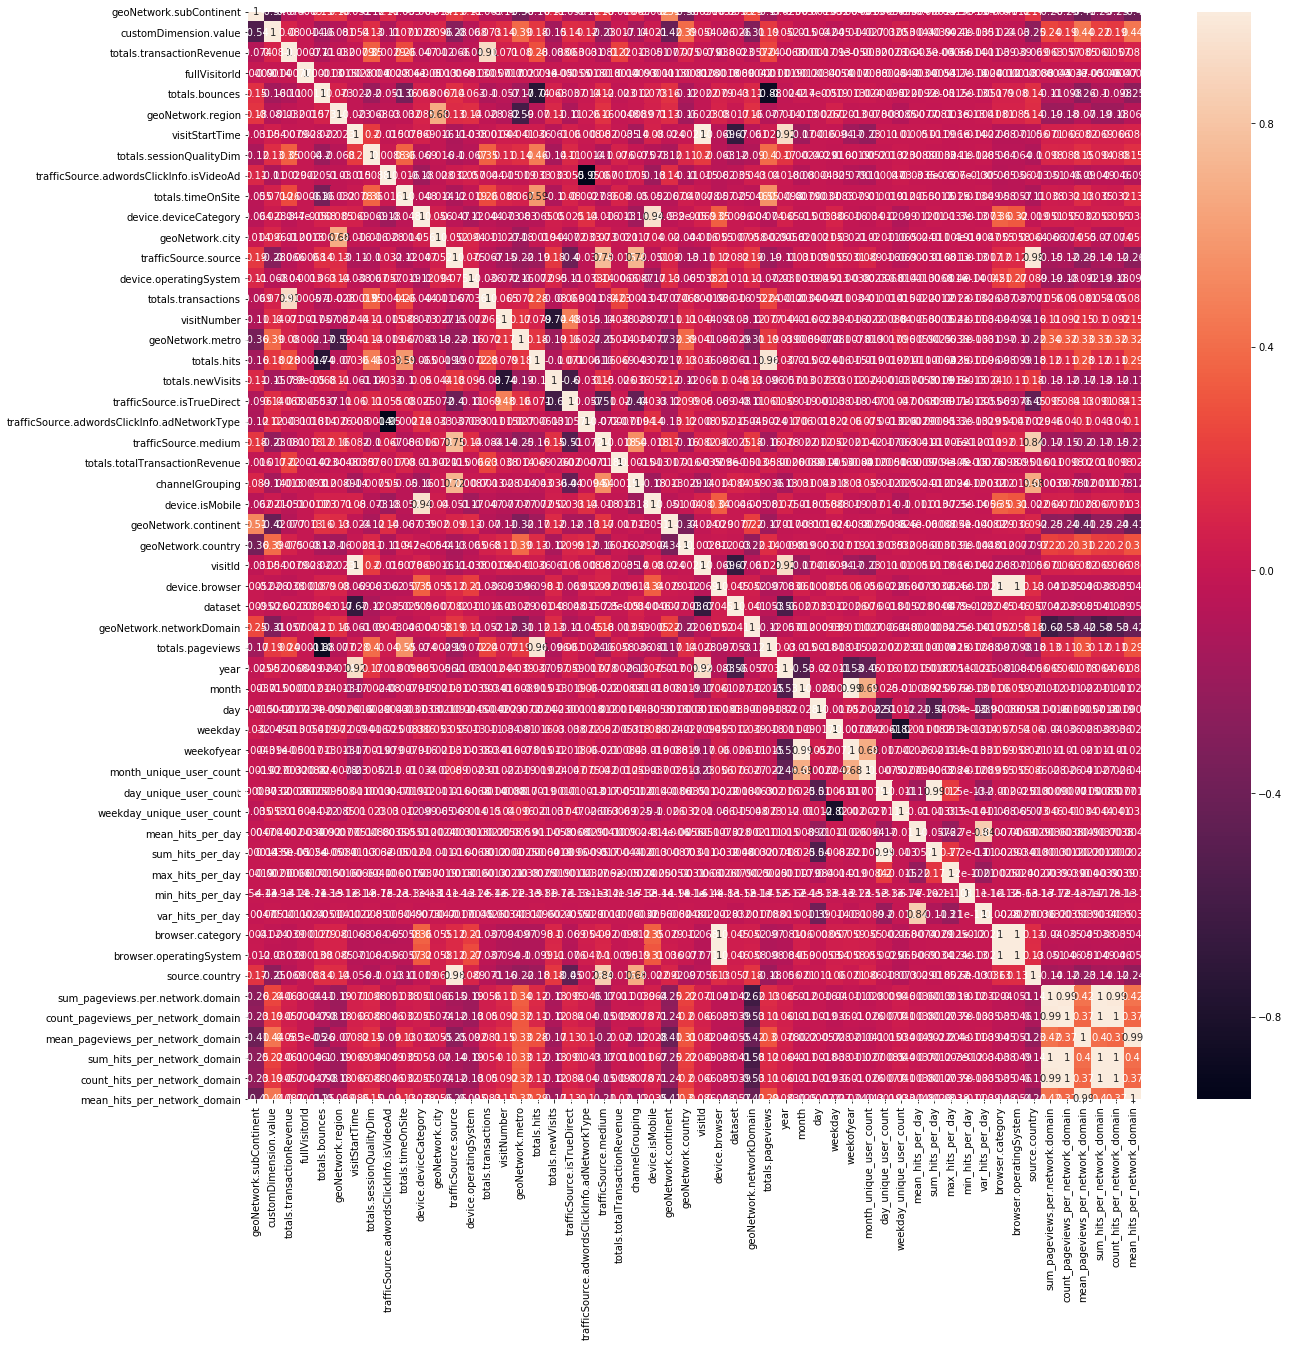

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(rff.corr(),annot=True)

In [75]:
import gc, pickle
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ppscore as pps
#import shap, optuna
from pdpbox import pdp

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
rmse = lambda true, pred: mse(true, pred) ** 0.5
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA

In [85]:
rff['dataset'].value_counts()

1    1708337
0     401589
Name: dataset, dtype: int64

In [72]:
train_rff = rff[rff['dataset']==1]
test_rff = rff[rff['dataset']==0]
train_rff.drop('dataset',axis=1,inplace=True)
test_rff.drop('dataset',axis=1, inplace=True)

In [81]:
x_trn_rff = train_rff.drop(['totals.transactionRevenue','date'],axis=1)
x_tst_rff = test_rff.drop(['totals.transactionRevenue','date'],axis=1)
y_trn_rff = train_rff['totals.transactionRevenue']
y_tst_rff = test_rff['totals.transactionRevenue']

In [76]:
def get_error(pred, true):
    print(f'RMSE:       {rmse(true, pred)}')
    print(f'MAE:        {mae(true, pred)}')

In [90]:
get_error(pred = np.array([np.mean(y_trn_rff) for _ in range(len(y_tst_rff))]),
          true = y_tst_rff)

RMSE:       0.3117786874480522
MAE:        0.06456221569218418


In [87]:
best_tun = {'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [91]:
best_rff = RandomForestRegressor(**best_tun)

trained_rff= best_rff.fit(x_trn_rff, y_trn_rff)

pred_rff = trained_rff.predict(x_tst_rff)

In [92]:
get_error(pred =pred_rff, true = y_tst_rff)

RMSE:       0.0008940013872920522
MAE:        4.823532682095149e-05


In [94]:
cat_cols =['geoNetwork.subContinent', 'customDimension.value', 'fullVisitorId',
       'geoNetwork.region', 'device.deviceCategory', 'geoNetwork.city',
       'trafficSource.source', 'device.operatingSystem', 'geoNetwork.metro',
       'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.medium',
       'channelGrouping', 'geoNetwork.continent', 'geoNetwork.country',
       'device.browser', 'dataset', 'geoNetwork.networkDomain',
       'browser.category', 'browser.operatingSystem', 'source.country']

In [95]:
def get_feature_importance(model, feature_names):

    # compute feature importances
    imp = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending = False)

    # add feature type
    imp['feat_type'] = imp.feature.apply(lambda feat: 'categorical' if feat in cat_cols else 'continuous')
    
    return imp.sort_values('importance', ascending = False)
imp = get_feature_importance(best_rff, x_trn_rff.columns.tolist())
px.bar(imp, x = 'feature', y = 'importance', color = 'feat_type')

In [98]:
correla = rff.corr()

In [111]:
correla[['totals.transactionRevenue']]#.sort_values(by='totals.transactionRevenue',ascending = False)

totals.transactionRevenue
geoNetwork.subContinent                                   -7.441099e-02
customDimension.value                                      8.045842e-02
totals.transactionRevenue                                  1.000000e+00
fullVisitorId                                             -7.670304e-04
totals.bounces                                            -1.051356e-01
geoNetwork.region                                         -3.203913e-02
visitStartTime                                            -7.894770e-03
totals.sessionQualityDim                                   3.458949e-01
trafficSource.adwordsClickInfo.isVideoAd                   2.879114e-03
totals.timeOnSite                                          2.553543e-01
device.deviceCategory                                     -4.736791e-02
geoNetwork.city                                           -1.176104e-02
trafficSource.source                                      -6.582256e-02
device.operatingSystem                                    -4.014423e-02
totals.transactions                                        9.109298e-01
visitNumber                                                7.089956e-02
geoNetwork.metro                                           7.953758e-02
totals.hits                                                2.813596e-01
totals.newVisits                                          -8.837160e-02
trafficSource.isTrueDirect                                 6.347319e-02
trafficSource.adwordsClickInfo.adNetworkType               3.086677e-03
trafficSource.medium                                      -8.094963e-02
totals.totalTransactionRevenue                             2.219592e-01
channelGrouping                                            1.250209e-02
device.isMobile                                           -5.063904e-02
geoNetwork.continent                                      -7.693862e-02
geoNetwork.country                                         7.473366e-02
visitId                                                   -7.894784e-03
device.browser                                            -3.846219e-02
dataset                                                   -2.283667e-03
geoNetwork.networkDomain                                  -5.679032e-02
totals.pageviews                                           2.420944e-01
year                                                      -6.771145e-03
month                                                     -1.011717e-04
day                                                        1.697165e-03
weekday                                                   -1.281569e-02
weekofyear                                                 8.964801e-05
month_unique_user_count                                   -3.187367e-03
day_unique_user_count                                     -2.649009e-04
weekday_unique_user_count                                  1.619123e-02
mean_hits_per_day                                          2.025782e-03
sum_hits_per_day                                          -4.472578e-05
max_hits_per_day                                          -6.613243e-04
min_hits_per_day                                           4.881315e-14
var_hits_per_day                                           1.138481e-03
browser.category                                          -3.912900e-02
browser.operatingSystem                                   -3.933153e-02
source.country                                            -6.948859e-02
sum_pageviews.per.network.domain                           6.307015e-02
count_pageviews_per_network_domain                         5.692724e-02
mean_pageviews_per_network_domain                          8.543882e-02
sum_hits_per_network_domain                                6.061142e-02
count_hits_per_network_domain                              5.692724e-02
mean_hits_per_network_domain                               8.730586e-02

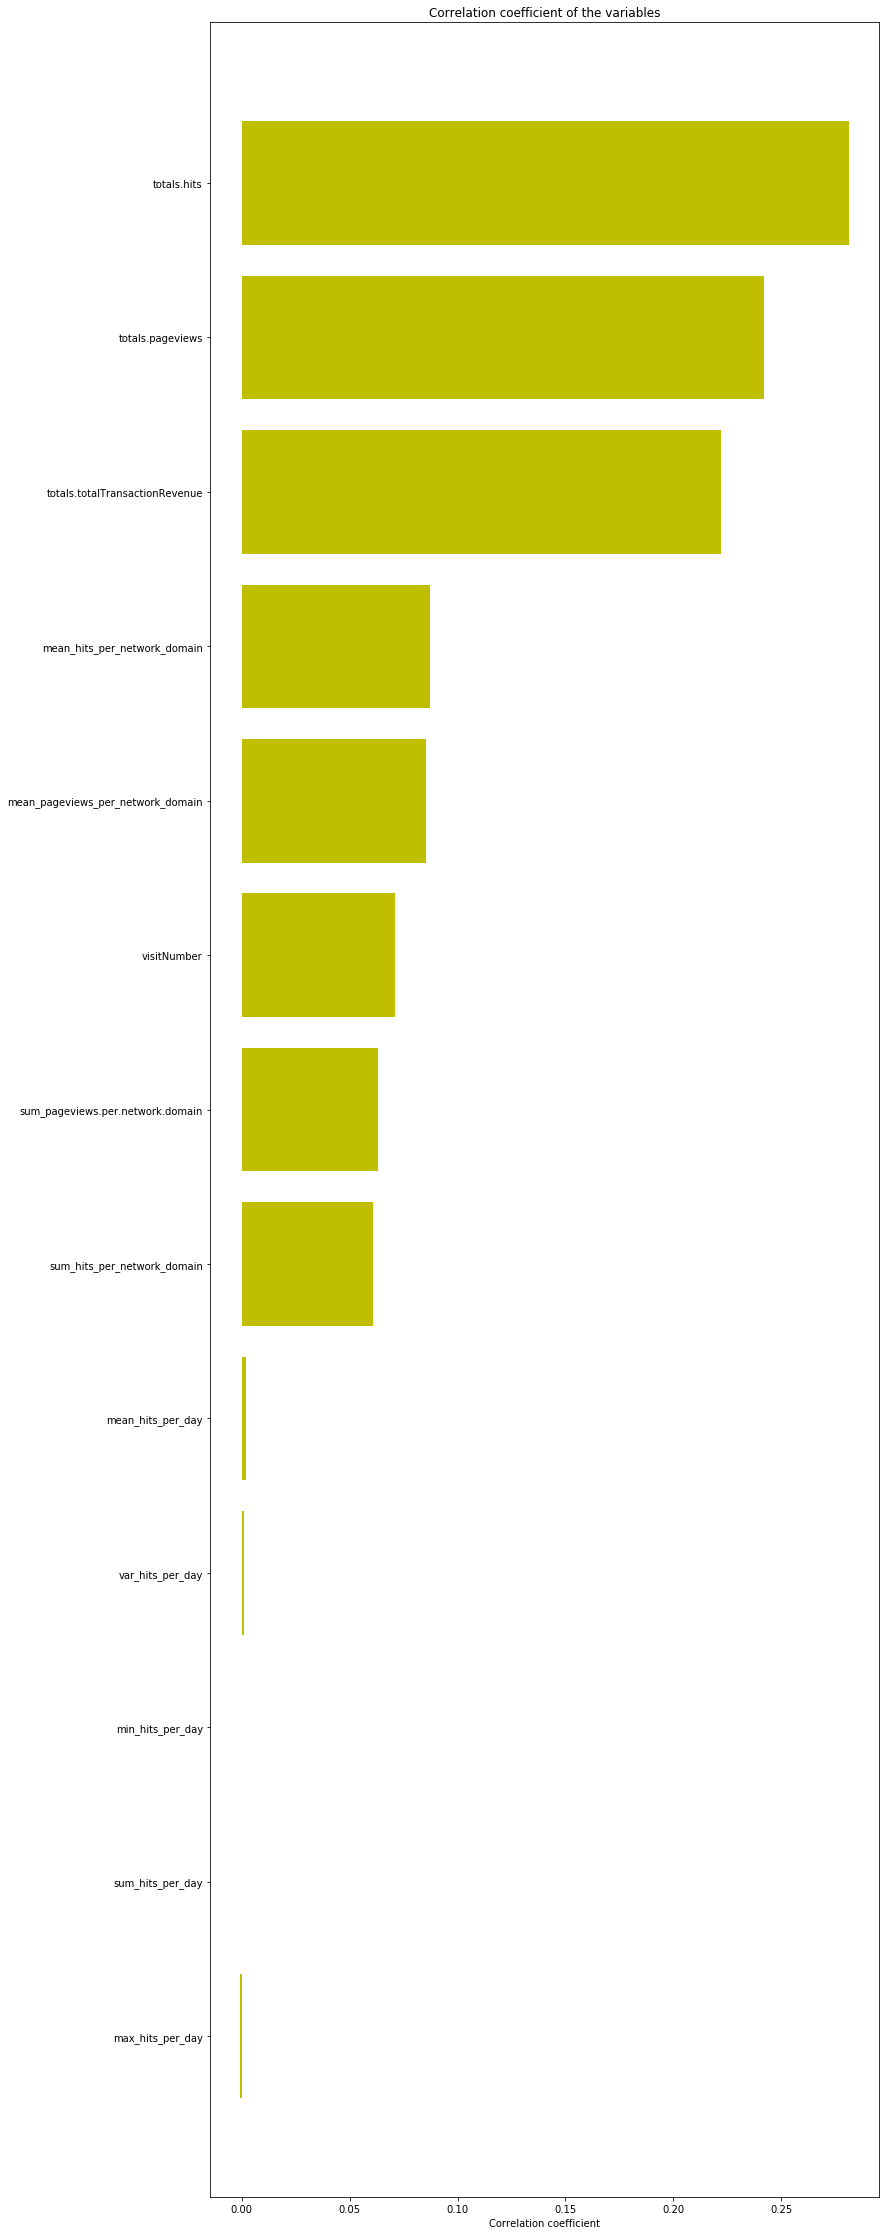

In [113]:


#Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in rff.columns if col not in ['totals.transactionRevenue'] if rff[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(rff[col].values, rff['totals.transactionRevenue'].values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()